# Template Matching

+ Template matching is the simplest form of object detection
+ It simply scans a larger image for a provided template by sliding the template target image across the larger image
+ The main option that can be adjusted is the comparison method used as the target template is slid across the larger image
+ The methods are all some sort of correlation based metric

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
full = cv2.imread("../imgs/sammy.jpg")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

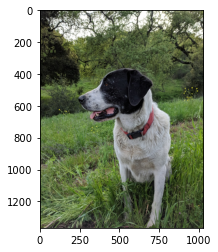

In [3]:
plt.imshow(full)

In [6]:
face = cv2.imread("../imgs/sammy_face.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

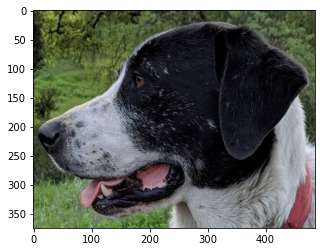

In [7]:
plt.imshow(face)

In [8]:
face.shape

(375, 486, 3)

### Opencv Matching Methods

In [9]:
methods = ["cv2.TM_CCOEFF", "cv2.TM_CCOEFF_NORMED", "cv2.TM_CCORR", "cv2.TM_CCORR_NORMED", "cv2.TM_SQDIFF", "cv2.TM_SQDIFF_NORMED"]

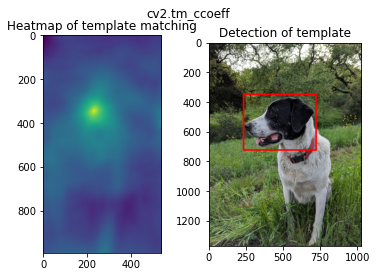

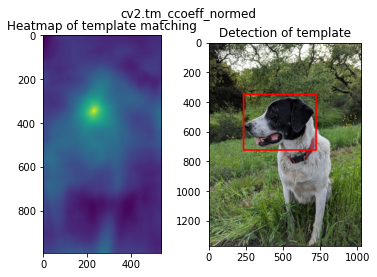

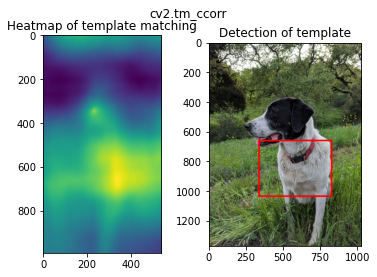

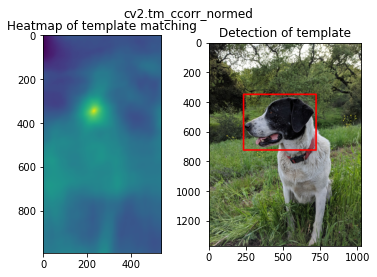

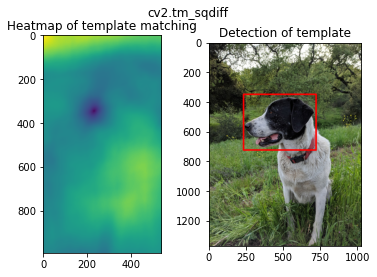

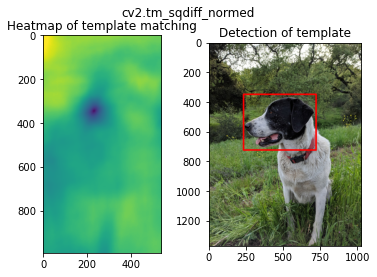

In [12]:
for m in methods:
    
    # Create a copy
    full_copy = full.copy()
    
    method = eval(m)
    
    # Template Matching
    result = cv2.matchTemplate(full_copy,face,method)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(result)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc  # (x,y)
    else:
        top_left = max_loc
        
    height,width,channels = face.shape
    
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 10)
    
    # plt and show images
    plt.subplot(121)
    plt.imshow(result)
    plt.title("Heatmap of template matching")
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("Detection of template")
    
    # TITLE FOR BOTH IMAGES
    plt.suptitle(m.lower())
    
    plt.show()
    
    print("\n\n")

# Well Done!